In [1]:
import numpy as np

import torch
from torch import nn
from torch import optim

# Activation & Loss Functions

Between layers of a Neural Network, we pass values derived from the previous layer. We call this set of values the Activations of the layer. Before we pass the values, we would apply some form of Activation Function to introduce non-linearity to the Network.

I will be consolidating all types of Activation Functions I know of in this notebook.
List of Activation Functions:
1. Sigmoid
    - 1 / (1+e^-x)
    - 0 to 1
2. Tanh - -1 to 1 
    - (e^z - e^-z) / (e^z + e ^-z)
    - -1 to 1
3. ReLU
    - a = max(0, z)
4. Leaky ReLU
    - a = max(0.01z, z)
5. SELU
    - z > 0; a = lambda * z
    - z <=0; a = lambda(alpha*e^z - alpha)
    - lambda = 1.0507, alpha = 1.6733

5. Softmax

In [2]:
from sklearn.datasets import make_classification, make_regression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline

## Sigmoid

In [3]:
x, y = make_classification(n_samples=100, 
                           n_features=2, 
                           n_classes=2,
                           n_informative=2,
                           n_redundant=0,
                           flip_y=0.1,
                           class_sep=0.9
                          )

x = torch.from_numpy(x).float()
y = torch.from_numpy(y).long()

In [4]:
# values of x
print(x.min())
print(x.max())

tensor(-3.1880)
tensor(3.1754)


In [5]:
x_sig = torch.sigmoid(x)
print(x_sig.min())
print(x_sig.max())

tensor(0.0396)
tensor(0.9599)


Observe that the sigmoid functions converts the values between 0 to 1.

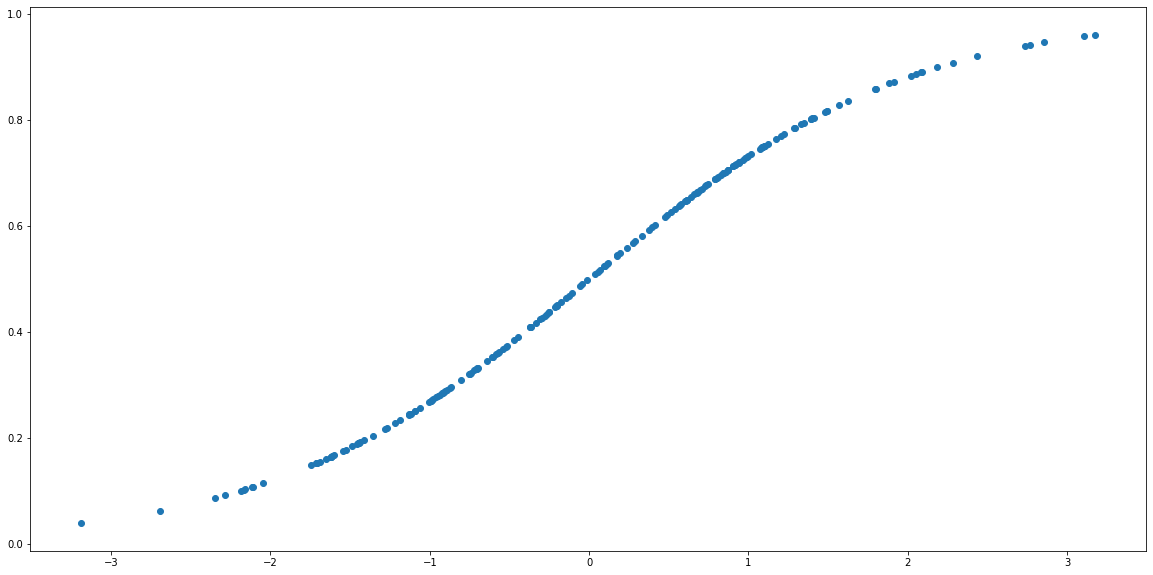

In [6]:
plt.figure(figsize=[20,10])
plt.scatter(x.view(200), x_sig.view(200))

## Tanh

In [7]:
x_tanh = torch.tanh(x)
print(x_tanh.min())
print(x_tanh.max())

tensor(-0.9966)
tensor(0.9965)


The Tanh function has a slight deviation than Sigmoid where it restricts the bottom to -1 instead of 0 giving it a range from -1 to 1.

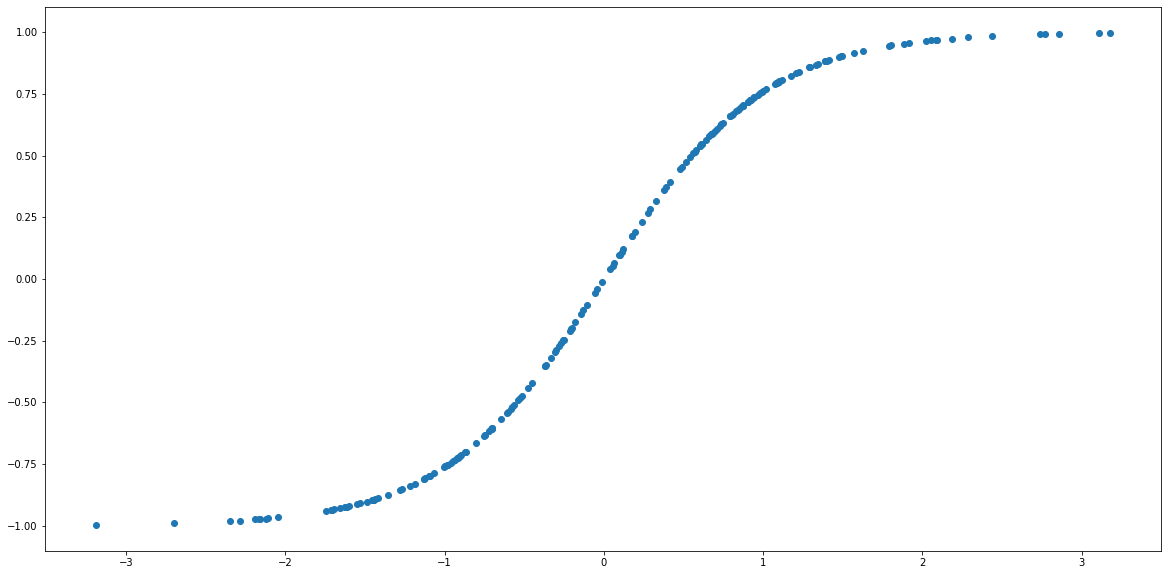

In [8]:
plt.figure(figsize=[20,10])
plt.scatter(x.view(200), x_tanh.view(200))

## Sigmoid vs. Tanh

Training a simple Sigmoid Network

In [9]:
# Network Architecture
sigmoid_model = nn.Sequential(
    nn.Linear(2,2),
    nn.Sigmoid()
)

# loss function - CrossEntropy, optimiser - SGD
criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(sigmoid_model.parameters(), lr=0.1)

In [10]:
# Training the model
epochs = 1000
loss = []

for e in range(epochs):
    optimiser.zero_grad() # zero gradients
    
    output = sigmoid_model.forward(x) # forward prop
    running_loss = criterion(output, y) # calculate loss
    loss.append(running_loss.item()) # store loss
    running_loss.backward() # back prop
    optimiser.step() #  update weights
    
    if e % 10 == 0:
        print('{}/{} --- Loss: {}'.format(e+1, epochs, running_loss))

1/1000 --- Loss: 0.7157143354415894
11/1000 --- Loss: 0.6937730312347412
21/1000 --- Loss: 0.6731667518615723
31/1000 --- Loss: 0.6544654965400696
41/1000 --- Loss: 0.6379553079605103
51/1000 --- Loss: 0.6236545443534851
61/1000 --- Loss: 0.6113972663879395
71/1000 --- Loss: 0.6009264588356018
81/1000 --- Loss: 0.5919662714004517
91/1000 --- Loss: 0.5842610597610474
101/1000 --- Loss: 0.5775915384292603
111/1000 --- Loss: 0.5717762112617493
121/1000 --- Loss: 0.5666678547859192
131/1000 --- Loss: 0.5621485114097595
141/1000 --- Loss: 0.5581232309341431
151/1000 --- Loss: 0.5545148253440857
161/1000 --- Loss: 0.5512616038322449
171/1000 --- Loss: 0.5483130812644958
181/1000 --- Loss: 0.545627236366272
191/1000 --- Loss: 0.5431699156761169
201/1000 --- Loss: 0.5409125089645386
211/1000 --- Loss: 0.5388308167457581
221/1000 --- Loss: 0.5369045734405518
231/1000 --- Loss: 0.5351163744926453
241/1000 --- Loss: 0.5334515571594238
251/1000 --- Loss: 0.5318973064422607
261/1000 --- Loss: 0.530

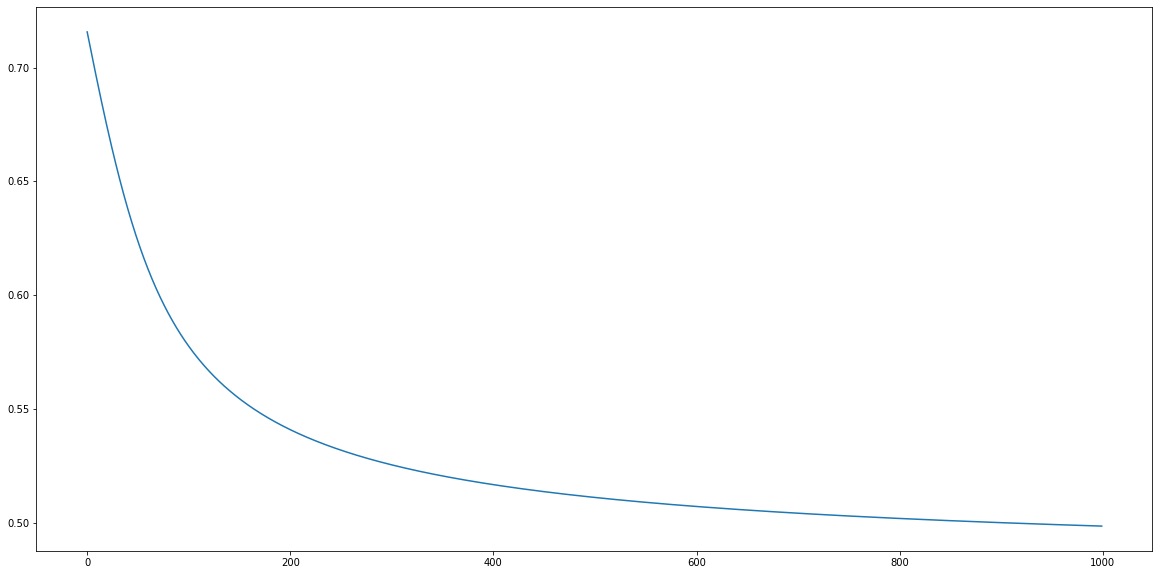

In [11]:
plt.figure(figsize=[20,10])
plt.plot(range(epochs), loss)

Training a simple Tanh Network

In [12]:
# Network Architecture
tanh_model = nn.Sequential(
    nn.Linear(2,2),
    nn.Tanh()
)

# loss function - CrossEntropy, optimiser - SGD
criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(tanh_model.parameters(), lr=0.1)

In [13]:
# Training the model
epochs = 1000
loss = []

for e in range(epochs):
    optimiser.zero_grad() # zero gradients
    
    output = tanh_model.forward(x) # forward prop
    running_loss = criterion(output, y) # calculate loss
    loss.append(running_loss) # store loss
    running_loss.backward() # back prop
    optimiser.step() #  update weights
    
    if e % 10 == 0:
        print('{}/{} --- Loss: {}'.format(e+1, epochs, running_loss))

1/1000 --- Loss: 0.5846388936042786
11/1000 --- Loss: 0.5437929034233093
21/1000 --- Loss: 0.5053378939628601
31/1000 --- Loss: 0.47641241550445557
41/1000 --- Loss: 0.45864540338516235
51/1000 --- Loss: 0.447881817817688
61/1000 --- Loss: 0.4409412443637848
71/1000 --- Loss: 0.4361635148525238
81/1000 --- Loss: 0.43269529938697815
91/1000 --- Loss: 0.43007224798202515
101/1000 --- Loss: 0.42802393436431885
111/1000 --- Loss: 0.42638370394706726
121/1000 --- Loss: 0.4250434637069702
131/1000 --- Loss: 0.4239300489425659
141/1000 --- Loss: 0.42299240827560425
151/1000 --- Loss: 0.4221936762332916
161/1000 --- Loss: 0.42150628566741943
171/1000 --- Loss: 0.4209097921848297
181/1000 --- Loss: 0.4203886091709137
191/1000 --- Loss: 0.4199298620223999
201/1000 --- Loss: 0.41952383518218994
211/1000 --- Loss: 0.41916272044181824
221/1000 --- Loss: 0.4188399612903595
231/1000 --- Loss: 0.4185500741004944
241/1000 --- Loss: 0.41828909516334534
251/1000 --- Loss: 0.4180530309677124
261/1000 --- 

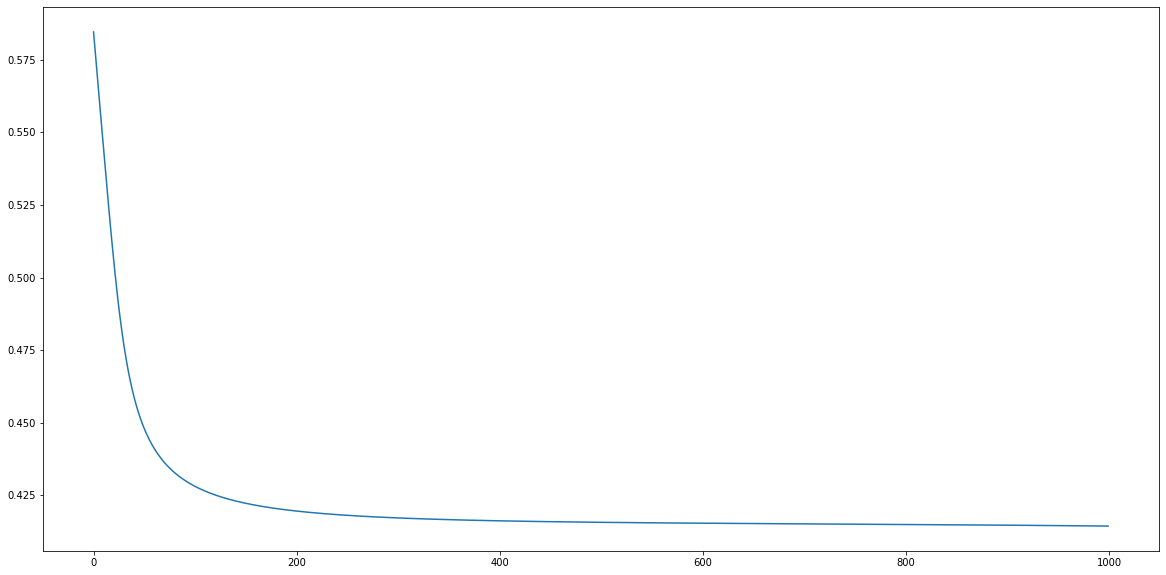

In [14]:
plt.figure(figsize=[20,10])
plt.plot(range(epochs), loss)

Based on the loss graphs of the Sigmoid and Tanh, we can observe that overall, the Tanh Network learned much quicker and converges to a lower loss value overall. This is largely attributed to the Tanh function being centered around 0 which makes learning much smoother.

## Vanishing Gradient

If we observe both the Sigmoid and Tanh charts earlier, we can see that the gradients of both functions becomes gentler as the value of x approaches higher magnitudes. This often causes what is known as vanishing gradients. This means that the gradients of values with high magnitudes tends towards 0, making it extremely difficult or impossible to learn.

We observe the sigmoid function first

1/1000 --- Loss: 0.6538974642753601
11/1000 --- Loss: 0.5908755660057068
21/1000 --- Loss: 0.5860422253608704
31/1000 --- Loss: 0.5860403180122375
41/1000 --- Loss: 0.5860384702682495
51/1000 --- Loss: 0.5860366225242615
61/1000 --- Loss: 0.5860347747802734
71/1000 --- Loss: 0.5860329866409302
81/1000 --- Loss: 0.5860311388969421
91/1000 --- Loss: 0.5860292911529541
101/1000 --- Loss: 0.5860275626182556
111/1000 --- Loss: 0.5860257148742676
121/1000 --- Loss: 0.5860240459442139
131/1000 --- Loss: 0.586022138595581
141/1000 --- Loss: 0.5860204696655273
151/1000 --- Loss: 0.5860186815261841
161/1000 --- Loss: 0.5860170125961304
171/1000 --- Loss: 0.5860152244567871
181/1000 --- Loss: 0.5860135555267334
191/1000 --- Loss: 0.5860118269920349
201/1000 --- Loss: 0.586010217666626
211/1000 --- Loss: 0.5860084891319275
221/1000 --- Loss: 0.586006760597229
231/1000 --- Loss: 0.5860050916671753
241/1000 --- Loss: 0.5860034823417664
251/1000 --- Loss: 0.5860018730163574
261/1000 --- Loss: 0.58600

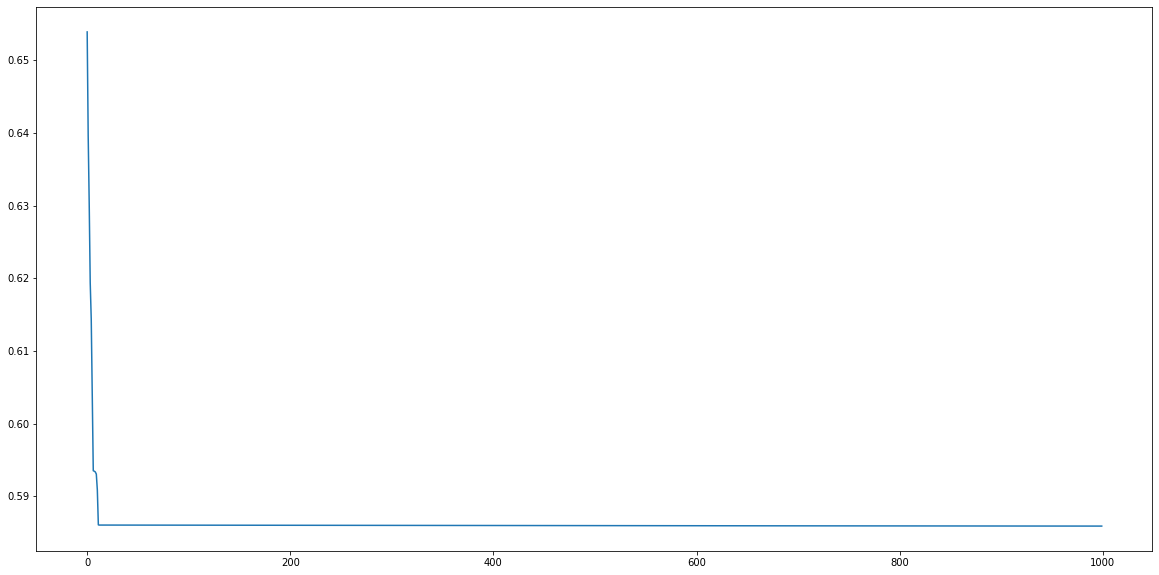

In [15]:
# multiply by 100
temp_x = x * 100

# Network Architecture
sigmoid_model = nn.Sequential(
    nn.Linear(2,2),
    nn.Sigmoid()
)

# loss function - CrossEntropy, optimiser - SGD
criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(sigmoid_model.parameters(), lr=0.1)

# Training the model
epochs = 1000
loss = []

for e in range(epochs):
    optimiser.zero_grad() # zero gradients
    
    output = sigmoid_model.forward(temp_x) # forward prop
    running_loss = criterion(output, y) # calculate loss
    loss.append(running_loss.item()) # store loss
    running_loss.backward() # back prop
    optimiser.step() #  update weights
    
    if e % 10 == 0:
        print('{}/{} --- Loss: {}'.format(e+1, epochs, running_loss))
        
plt.figure(figsize=[20,10])
plt.plot(range(epochs), loss)

1/1000 --- Loss: 0.7351976633071899
11/1000 --- Loss: 0.6849918365478516
21/1000 --- Loss: 0.6849918365478516
31/1000 --- Loss: 0.6849917769432068
41/1000 --- Loss: 0.6849917769432068
51/1000 --- Loss: 0.6849917769432068
61/1000 --- Loss: 0.6849916577339172
71/1000 --- Loss: 0.6849916577339172
81/1000 --- Loss: 0.6849915385246277
91/1000 --- Loss: 0.6849794983863831
101/1000 --- Loss: 0.6470034718513489
111/1000 --- Loss: 0.6470034718513489
121/1000 --- Loss: 0.6470034718513489
131/1000 --- Loss: 0.6470034718513489
141/1000 --- Loss: 0.6470034718513489
151/1000 --- Loss: 0.6470034718513489
161/1000 --- Loss: 0.6470034122467041
171/1000 --- Loss: 0.6470034122467041
181/1000 --- Loss: 0.6470034122467041
191/1000 --- Loss: 0.6470034122467041
201/1000 --- Loss: 0.6470034122467041
211/1000 --- Loss: 0.6470034122467041
221/1000 --- Loss: 0.6470034122467041
231/1000 --- Loss: 0.6470034122467041
241/1000 --- Loss: 0.6470034122467041
251/1000 --- Loss: 0.6470034122467041
261/1000 --- Loss: 0.64

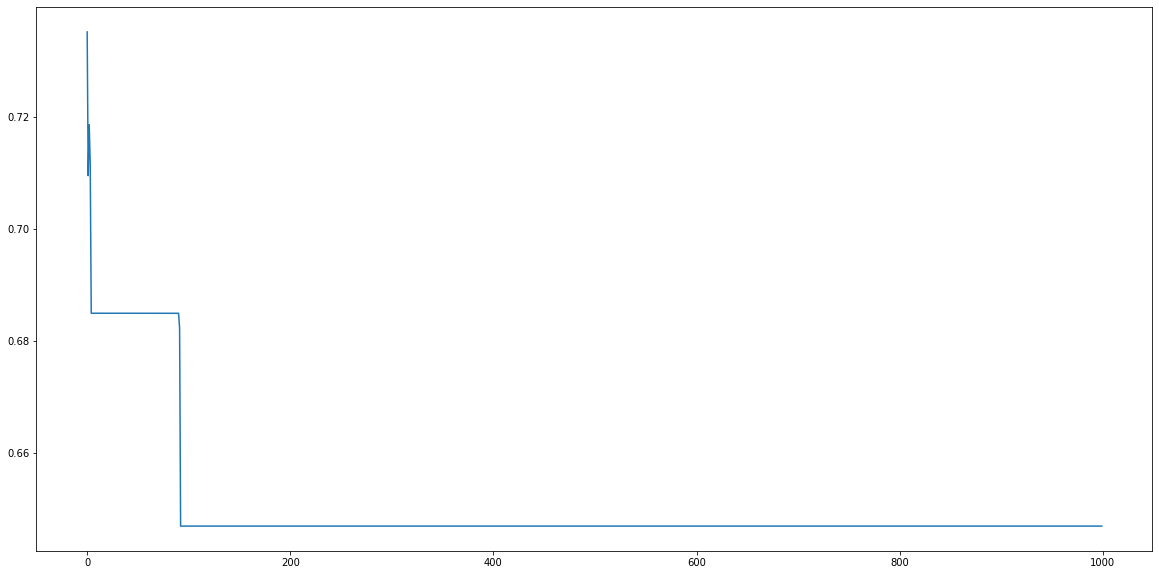

In [16]:
# multiply by 1,000
temp_x = x * 1000

# Network Architecture
sigmoid_model = nn.Sequential(
    nn.Linear(2,2),
    nn.Sigmoid()
)

# loss function - CrossEntropy, optimiser - SGD
criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(sigmoid_model.parameters(), lr=0.1)

# Training the model
epochs = 1000
loss = []

for e in range(epochs):
    optimiser.zero_grad() # zero gradients
    
    output = sigmoid_model.forward(temp_x) # forward prop
    running_loss = criterion(output, y) # calculate loss
    loss.append(running_loss.item()) # store loss
    running_loss.backward() # back prop
    optimiser.step() #  update weights
    
    if e % 10 == 0:
        print('{}/{} --- Loss: {}'.format(e+1, epochs, running_loss))
        
plt.figure(figsize=[20,10])
plt.plot(range(epochs), loss)

1/1000 --- Loss: 0.6963881850242615
11/1000 --- Loss: 0.6963881850242615
21/1000 --- Loss: 0.6963881850242615
31/1000 --- Loss: 0.6963881850242615
41/1000 --- Loss: 0.6963881850242615
51/1000 --- Loss: 0.6963881850242615
61/1000 --- Loss: 0.6963881850242615
71/1000 --- Loss: 0.6963881850242615
81/1000 --- Loss: 0.6963881850242615
91/1000 --- Loss: 0.6963881850242615
101/1000 --- Loss: 0.6963881850242615
111/1000 --- Loss: 0.6963881850242615
121/1000 --- Loss: 0.6963881850242615
131/1000 --- Loss: 0.6963881850242615
141/1000 --- Loss: 0.6963881850242615
151/1000 --- Loss: 0.6963881850242615
161/1000 --- Loss: 0.6963881850242615
171/1000 --- Loss: 0.6963881850242615
181/1000 --- Loss: 0.6963881850242615
191/1000 --- Loss: 0.6963881850242615
201/1000 --- Loss: 0.6963881850242615
211/1000 --- Loss: 0.6963881850242615
221/1000 --- Loss: 0.6963881850242615
231/1000 --- Loss: 0.6963881850242615
241/1000 --- Loss: 0.6963881850242615
251/1000 --- Loss: 0.6963881850242615
261/1000 --- Loss: 0.69

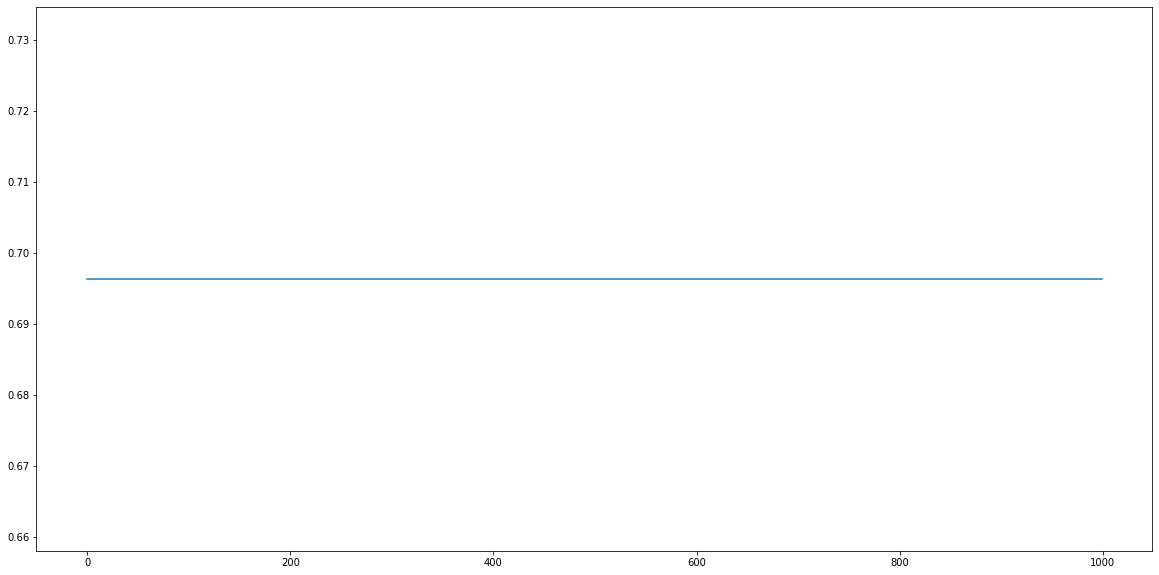

In [17]:
# multiply by 10,000
temp_x = x * 10000

# Network Architecture
sigmoid_model = nn.Sequential(
    nn.Linear(2,2),
    nn.Sigmoid()
)

# loss function - CrossEntropy, optimiser - SGD
criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(sigmoid_model.parameters(), lr=0.1)

# Training the model
epochs = 1000
loss = []

for e in range(epochs):
    optimiser.zero_grad() # zero gradients
    
    output = sigmoid_model.forward(temp_x) # forward prop
    running_loss = criterion(output, y) # calculate loss
    loss.append(running_loss.item()) # store loss
    running_loss.backward() # back prop
    optimiser.step() #  update weights
    
    if e % 10 == 0:
        print('{}/{} --- Loss: {}'.format(e+1, epochs, running_loss))
        
plt.figure(figsize=[20,10])
plt.plot(range(epochs), loss)

We observe that learning becomes less and less smooth and eventually, impossible as the values of x increases.

1/1000 --- Loss: 1.1261000633239746
11/1000 --- Loss: 0.5751093626022339
21/1000 --- Loss: 0.5643556118011475
31/1000 --- Loss: 0.5643467903137207
41/1000 --- Loss: 0.5643390417098999
51/1000 --- Loss: 0.5643320083618164
61/1000 --- Loss: 0.5643255114555359
71/1000 --- Loss: 0.564319372177124
81/1000 --- Loss: 0.5643136501312256
91/1000 --- Loss: 0.5643081068992615
101/1000 --- Loss: 0.5643028020858765
111/1000 --- Loss: 0.5642978549003601
121/1000 --- Loss: 0.5642930269241333
131/1000 --- Loss: 0.5642884969711304
141/1000 --- Loss: 0.564284086227417
151/1000 --- Loss: 0.5642798542976379
161/1000 --- Loss: 0.5642757415771484
171/1000 --- Loss: 0.564271867275238
181/1000 --- Loss: 0.5642679929733276
191/1000 --- Loss: 0.5642643570899963
201/1000 --- Loss: 0.564260721206665
211/1000 --- Loss: 0.5642572641372681
221/1000 --- Loss: 0.5642538666725159
231/1000 --- Loss: 0.5642505884170532
241/1000 --- Loss: 0.5642473697662354
251/1000 --- Loss: 0.5642443299293518
261/1000 --- Loss: 0.564241

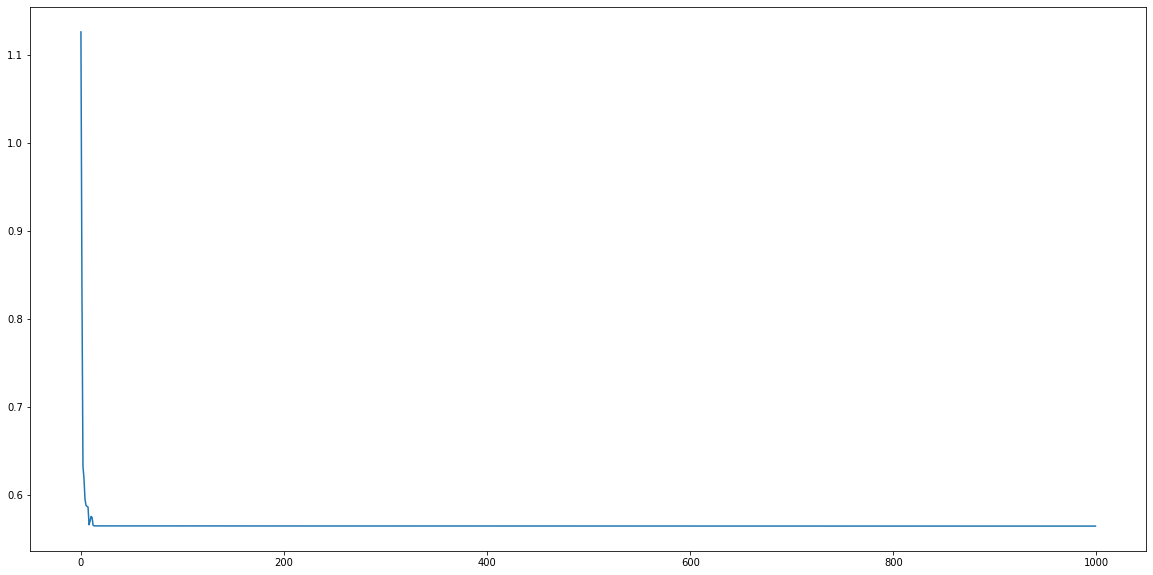

In [18]:
# multiply by 100
temp_x = x * 100

# Network Architecture
tanh_model = nn.Sequential(
    nn.Linear(2,2),
    nn.Tanh()
)

# loss function - CrossEntropy, optimiser - SGD
criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(tanh_model.parameters(), lr=0.1)

# Training the model
epochs = 1000
loss = []

for e in range(epochs):
    optimiser.zero_grad() # zero gradients
    
    output = tanh_model.forward(temp_x) # forward prop
    running_loss = criterion(output, y) # calculate loss
    loss.append(running_loss.item()) # store loss
    running_loss.backward() # back prop
    optimiser.step() #  update weights
    
    if e % 10 == 0:
        print('{}/{} --- Loss: {}'.format(e+1, epochs, running_loss))
        
plt.figure(figsize=[20,10])
plt.plot(range(epochs), loss)

1/1000 --- Loss: 0.8164822459220886
11/1000 --- Loss: 0.7218222618103027
21/1000 --- Loss: 0.7218222618103027
31/1000 --- Loss: 0.7218222618103027
41/1000 --- Loss: 0.7218222618103027
51/1000 --- Loss: 0.7218222618103027
61/1000 --- Loss: 0.7218222618103027
71/1000 --- Loss: 0.7218222618103027
81/1000 --- Loss: 0.7218222618103027
91/1000 --- Loss: 0.7218222618103027
101/1000 --- Loss: 0.7218222618103027
111/1000 --- Loss: 0.7218222618103027
121/1000 --- Loss: 0.7218222618103027
131/1000 --- Loss: 0.7218222618103027
141/1000 --- Loss: 0.7218222618103027
151/1000 --- Loss: 0.7218222618103027
161/1000 --- Loss: 0.7218222618103027
171/1000 --- Loss: 0.7218222618103027
181/1000 --- Loss: 0.7218222618103027
191/1000 --- Loss: 0.7218222618103027
201/1000 --- Loss: 0.7218222618103027
211/1000 --- Loss: 0.7218222618103027
221/1000 --- Loss: 0.7218222618103027
231/1000 --- Loss: 0.7218222618103027
241/1000 --- Loss: 0.7218222618103027
251/1000 --- Loss: 0.7218222618103027
261/1000 --- Loss: 0.72

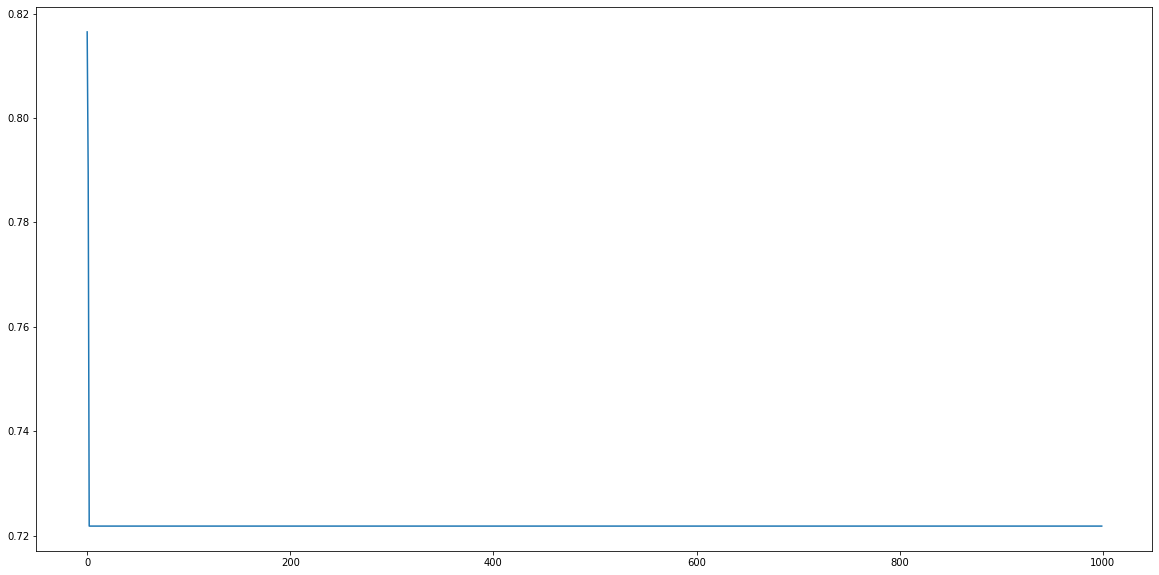

In [19]:
# multiply by 1,000
temp_x = x * 1000

# Network Architecture
tanh_model = nn.Sequential(
    nn.Linear(2,2),
    nn.Tanh()
)

# loss function - CrossEntropy, optimiser - SGD
criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(tanh_model.parameters(), lr=0.1)

# Training the model
epochs = 1000
loss = []

for e in range(epochs):
    optimiser.zero_grad() # zero gradients
    
    output = tanh_model.forward(temp_x) # forward prop
    running_loss = criterion(output, y) # calculate loss
    loss.append(running_loss.item()) # store loss
    running_loss.backward() # back prop
    optimiser.step() #  update weights
    
    if e % 10 == 0:
        print('{}/{} --- Loss: {}'.format(e+1, epochs, running_loss))
        
plt.figure(figsize=[20,10])
plt.plot(range(epochs), loss)

1/1000 --- Loss: 0.4428204596042633
11/1000 --- Loss: 0.4428204596042633
21/1000 --- Loss: 0.4428204596042633
31/1000 --- Loss: 0.4428204596042633
41/1000 --- Loss: 0.4428204596042633
51/1000 --- Loss: 0.4428204596042633
61/1000 --- Loss: 0.4428204596042633
71/1000 --- Loss: 0.4428204596042633
81/1000 --- Loss: 0.4428204596042633
91/1000 --- Loss: 0.4428204596042633
101/1000 --- Loss: 0.4428204596042633
111/1000 --- Loss: 0.4428204596042633
121/1000 --- Loss: 0.4428204596042633
131/1000 --- Loss: 0.4428204596042633
141/1000 --- Loss: 0.4428204596042633
151/1000 --- Loss: 0.4428204596042633
161/1000 --- Loss: 0.4428204596042633
171/1000 --- Loss: 0.4428204596042633
181/1000 --- Loss: 0.4428204596042633
191/1000 --- Loss: 0.4428204596042633
201/1000 --- Loss: 0.4428204596042633
211/1000 --- Loss: 0.4428204596042633
221/1000 --- Loss: 0.4428204596042633
231/1000 --- Loss: 0.4428204596042633
241/1000 --- Loss: 0.4428204596042633
251/1000 --- Loss: 0.4428204596042633
261/1000 --- Loss: 0.44

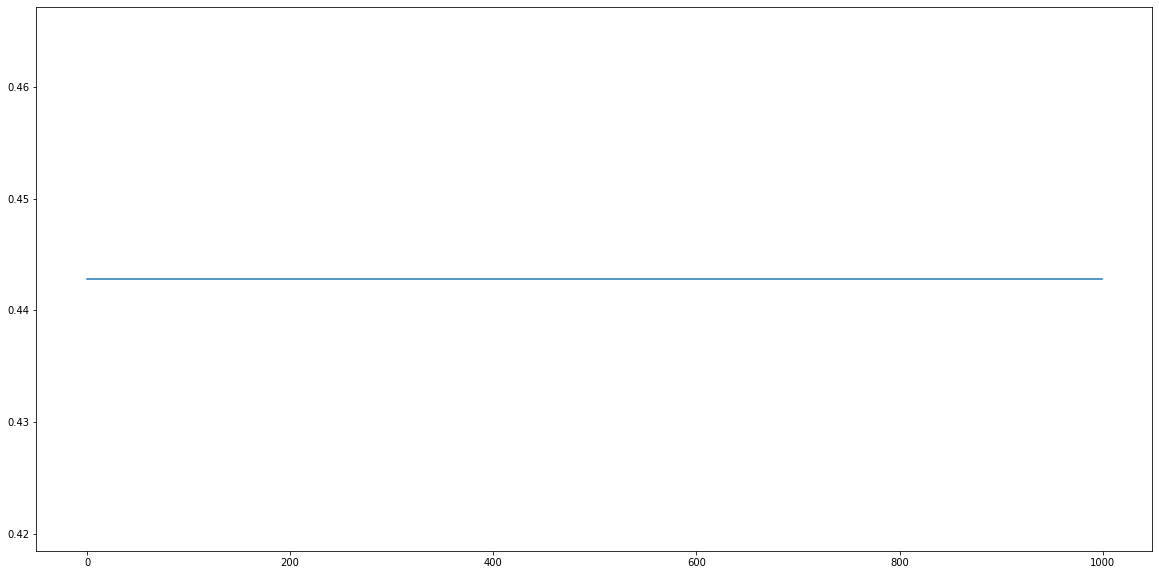

In [20]:
# multiply by 10,000
temp_x = x * 10000

# Network Architecture
tanh_model = nn.Sequential(
    nn.Linear(2,2),
    nn.Tanh()
)

# loss function - CrossEntropy, optimiser - SGD
criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(tanh_model.parameters(), lr=0.1)

# Training the model
epochs = 1000
loss = []

for e in range(epochs):
    optimiser.zero_grad() # zero gradients
    
    output = tanh_model.forward(temp_x) # forward prop
    running_loss = criterion(output, y) # calculate loss
    loss.append(running_loss.item()) # store loss
    running_loss.backward() # back prop
    optimiser.step() #  update weights
    
    if e % 10 == 0:
        print('{}/{} --- Loss: {}'.format(e+1, epochs, running_loss))
        
plt.figure(figsize=[20,10])
plt.plot(range(epochs), loss)

Similarly for the Tanh function, we observe the same problem.

## ReLU

In [21]:
x_relu = torch.relu(x)

In [22]:
print(x.min())
print(x.max())

tensor(-3.1880)
tensor(3.1754)


In [23]:
print(x_relu.min())
print(x_relu.max())

tensor(0.)
tensor(3.1754)


Notice how the maximum value of the values after relu is equal to those before and the minimum is 0. This is because ReLU fundamentally returns the same values for all positive values and 0 for negative values.

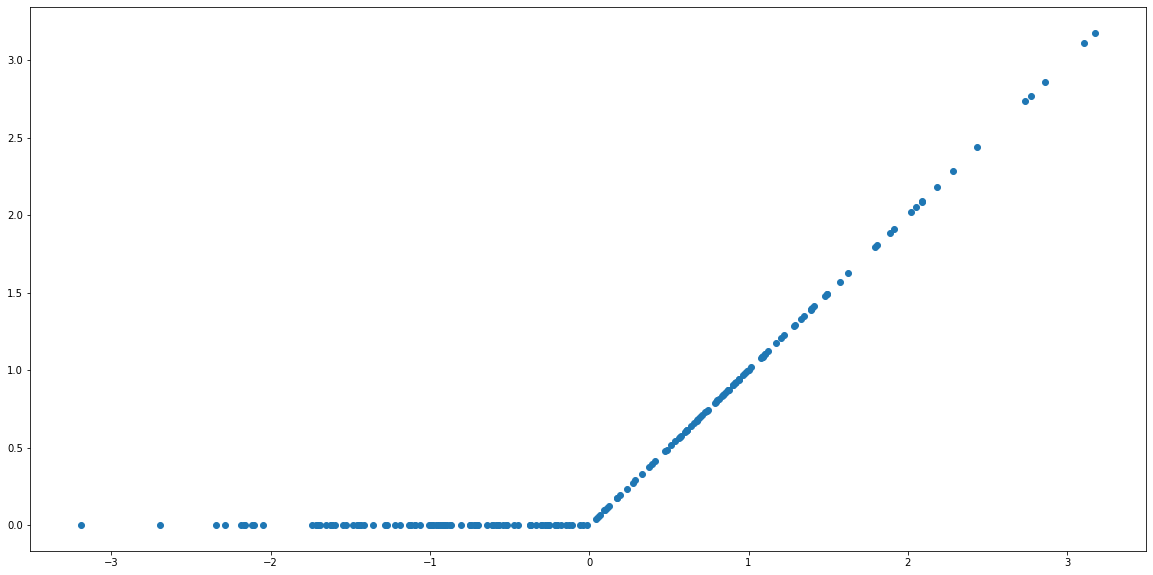

In [24]:
plt.figure(figsize=[20,10])
plt.scatter(x.view(200), x_relu.view(200))

The main breakthrough of ReLU is that it does not face the same vanishing gradient problem as Tanh and Sigmoid. Unlike them, ReLU has a constant gradient of 1 regardless of the x values. Its only limitation would be its 0 gradient for negative values.

### Dying ReLU

1/1000 --- Loss: 0.6931465864181519
11/1000 --- Loss: 0.6931465864181519
21/1000 --- Loss: 0.6931465864181519
31/1000 --- Loss: 0.6931465864181519
41/1000 --- Loss: 0.6931465864181519
51/1000 --- Loss: 0.6931465864181519
61/1000 --- Loss: 0.6931465864181519
71/1000 --- Loss: 0.6931465864181519
81/1000 --- Loss: 0.6931465864181519
91/1000 --- Loss: 0.6931465864181519
101/1000 --- Loss: 0.6931465864181519
111/1000 --- Loss: 0.6931465864181519
121/1000 --- Loss: 0.6931465864181519
131/1000 --- Loss: 0.6931465864181519
141/1000 --- Loss: 0.6931465864181519
151/1000 --- Loss: 0.6931465864181519
161/1000 --- Loss: 0.6931465864181519
171/1000 --- Loss: 0.6931465864181519
181/1000 --- Loss: 0.6931465864181519
191/1000 --- Loss: 0.6931465864181519
201/1000 --- Loss: 0.6931465864181519
211/1000 --- Loss: 0.6931465864181519
221/1000 --- Loss: 0.6931465864181519
231/1000 --- Loss: 0.6931465864181519
241/1000 --- Loss: 0.6931465864181519
251/1000 --- Loss: 0.6931465864181519
261/1000 --- Loss: 0.69

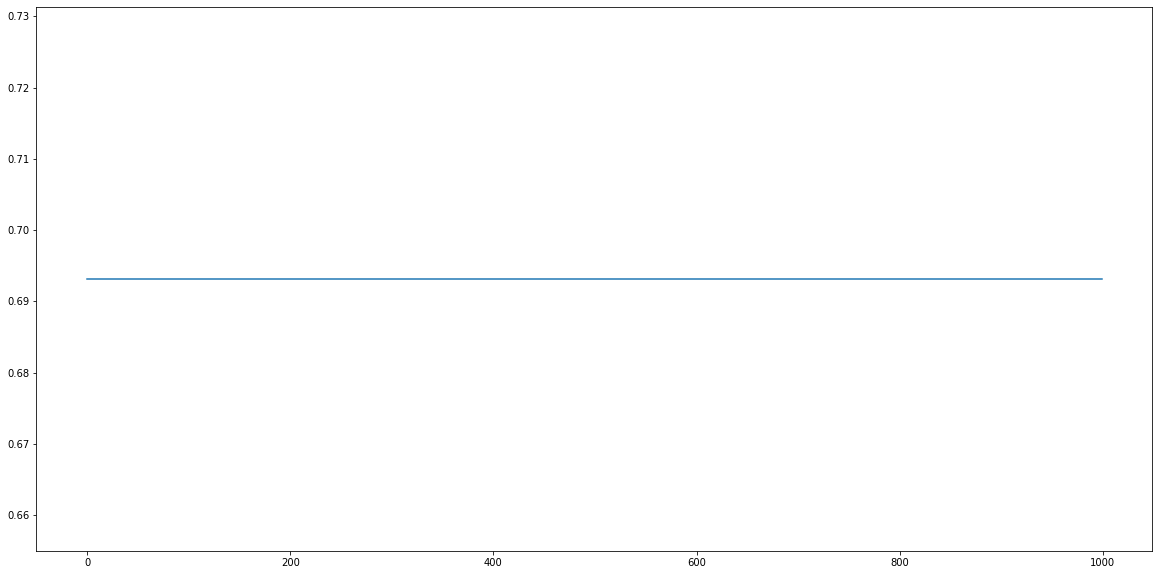

In [38]:
# convert all to negative values
temp_x = x - x.max() - 100

# Network Architecture
relu_model = nn.Sequential(
    nn.Linear(2,2),
    nn.ReLU()
)

# loss function - CrossEntropy, optimiser - SGD
criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(relu_model.parameters(), lr=0.1)

# Training the model
epochs = 1000
loss = []

for e in range(epochs):
    optimiser.zero_grad() # zero gradients
    
    output = relu_model.forward(temp_x) # forward prop
    running_loss = criterion(output, y) # calculate loss
    loss.append(running_loss.item()) # store loss
    running_loss.backward() # back prop
    optimiser.step() #  update weights
    
    if e % 10 == 0:
        print('{}/{} --- Loss: {}'.format(e+1, epochs, running_loss))
        
plt.figure(figsize=[20,10])
plt.plot(range(epochs), loss)

In [26]:
output[:5]

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]], grad_fn=<SliceBackward>)

As seen from the example above, due to the extreme negative x values, the Network is unable to learn from the start and thus got 'trapped' or resulted in the neurons 'dying'. We can identify this happening when the Network starts to output 0 or the loss function stops learning.

However, this is seldom the case as we wouldn't often see applications with extremely negative inputs. Even so, applying some form of normalisation would resolve the situation.

## Leaky ReLU - In case you still need to tackle this

In [27]:
x_leakyR = nn.LeakyReLU(0.01)
x_leakyR = x_leakyR(x)

In [28]:
print(x_leakyR.data.min())
print(x_leakyR.data.max())

tensor(-0.0319)
tensor(3.1754)


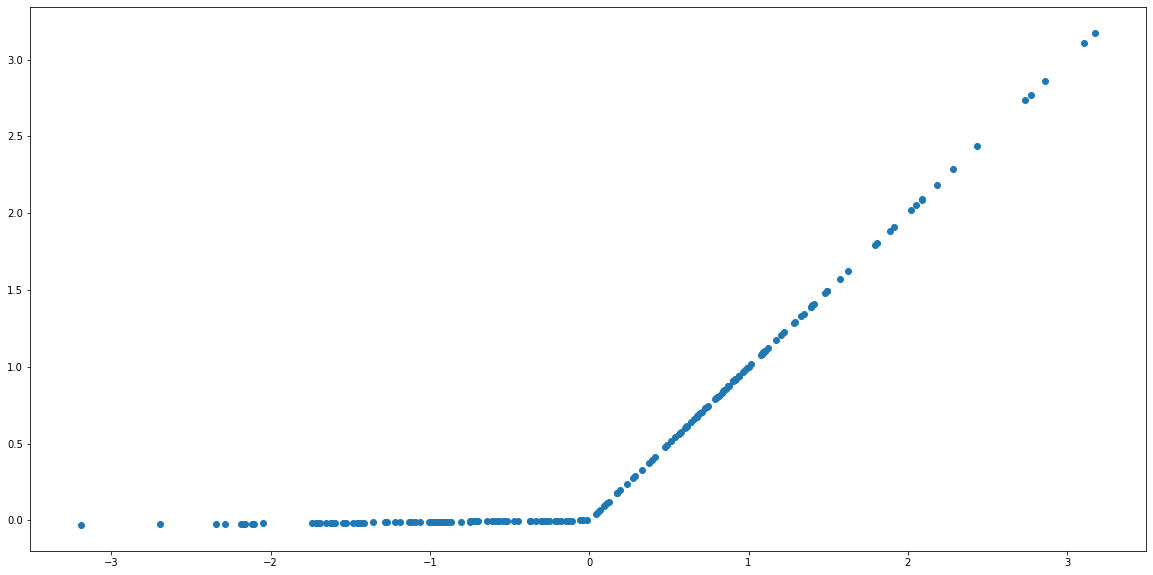

In [29]:
plt.figure(figsize=[20,10])
plt.scatter(x.view(200), x_leakyR.view(200))

Although slightly unclear, we now have a slight slope of 0.01 for the negative values.

How does this fix the dying relu?

1/1000 --- Loss: 0.6953549385070801
11/1000 --- Loss: 0.6946496367454529
21/1000 --- Loss: 0.6945528388023376
31/1000 --- Loss: 0.6945203542709351
41/1000 --- Loss: 0.6944950222969055
51/1000 --- Loss: 0.6944702863693237
61/1000 --- Loss: 0.6944457292556763
71/1000 --- Loss: 0.6944208741188049
81/1000 --- Loss: 0.6943962574005127
91/1000 --- Loss: 0.6943715810775757
101/1000 --- Loss: 0.694347083568573
111/1000 --- Loss: 0.6943220496177673
121/1000 --- Loss: 0.694297730922699
131/1000 --- Loss: 0.6942729353904724
141/1000 --- Loss: 0.6942482590675354
151/1000 --- Loss: 0.6942237019538879
161/1000 --- Loss: 0.6941990852355957
171/1000 --- Loss: 0.6941747069358826
181/1000 --- Loss: 0.6941498517990112
191/1000 --- Loss: 0.6941253542900085
201/1000 --- Loss: 0.6941007375717163
211/1000 --- Loss: 0.6940762400627136
221/1000 --- Loss: 0.6940515637397766
231/1000 --- Loss: 0.6940271258354187
241/1000 --- Loss: 0.6940023303031921
251/1000 --- Loss: 0.6939778923988342
261/1000 --- Loss: 0.6939

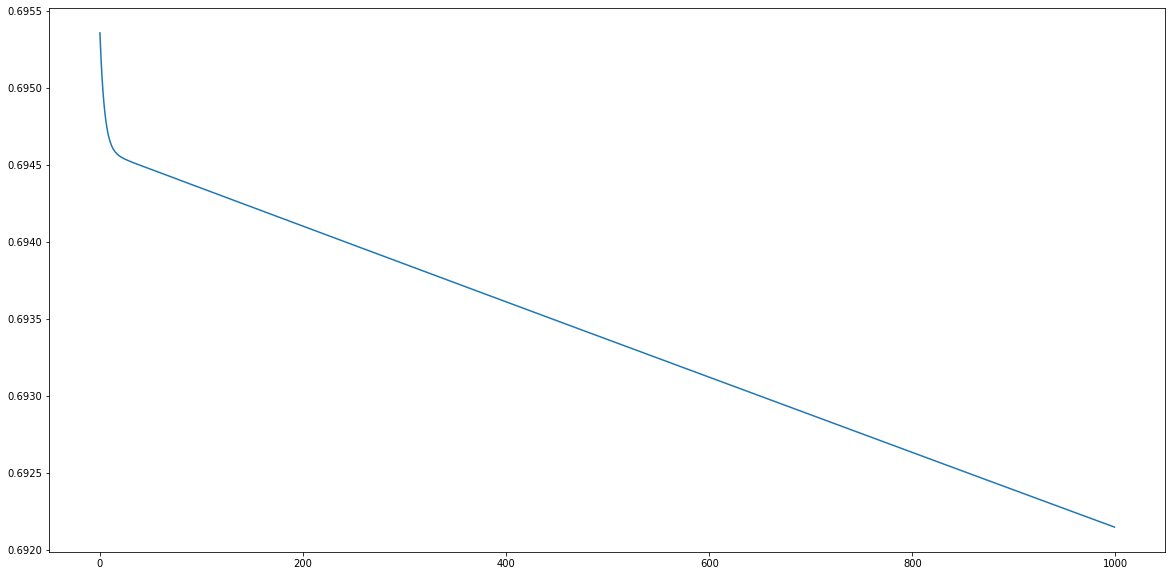

In [37]:
# convert all to negative values
temp_x = x - x.max() - 100

# Network Architecture
leaky_model = nn.Sequential(
    nn.Linear(2,2),
    nn.LeakyReLU()
)

# loss function - CrossEntropy, optimiser - SGD
criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(leaky_model.parameters(), lr=0.1)

# Training the model
epochs = 1000
loss = []

for e in range(epochs):
    optimiser.zero_grad() # zero gradients
    
    output = leaky_model.forward(temp_x) # forward prop
    running_loss = criterion(output, y) # calculate loss
    loss.append(running_loss.item()) # store loss
    running_loss.backward() # back prop
    optimiser.step() #  update weights
    
    if e % 10 == 0:
        print('{}/{} --- Loss: {}'.format(e+1, epochs, running_loss))
        
plt.figure(figsize=[20,10])
plt.plot(range(epochs), loss)

In [31]:
output[:5]

tensor([[-0.1378, -0.1330],
        [-0.1428, -0.1337],
        [-0.1204, -0.1201],
        [-0.1194, -0.0992],
        [-0.1389, -0.1204]], grad_fn=<SliceBackward>)

Although slowly, we see that the loss function continues to improve over the epochs. However, this is very insignificant. Overall, we should look for different techniques when dealing with a highly negative dataset.

## SELU

Known to outperform the ReLU function because it does not face the same 'dying unit' problem and because it is self-normalising. This notion of self-normalising is known as Internal Normalisation where the output of the SELU unit is normalised with a mean of 0 and standard deviation of 1. In addition, A network that implements Internal Normalisation is called a Self-normalisaing Neural Network.

Based on the original paper, this can only happen when the activation have both negative and positive values to control the mean, saturation regions (derivatives approaching zero) to dampen the variance if it is too large in the lower layers, a slope larger than 1 to increase the variance if it is too small in the lower layer, and a continuous curve that ensures a fixed point where variance damping is equalised by variance increasing.

SNNs are known to converge faster as internal normalisation is faster than external normalisation. It also mitigates the problem of vanishing and exploding gradients.

https://arxiv.org/pdf/1706.02515.pdf

In [32]:
x_selu = nn.SELU()
x_selu = x_selu(x)

In [33]:
print(x_selu.data.min())
print(x_selu.data.max())

tensor(-1.6856)
tensor(3.3363)


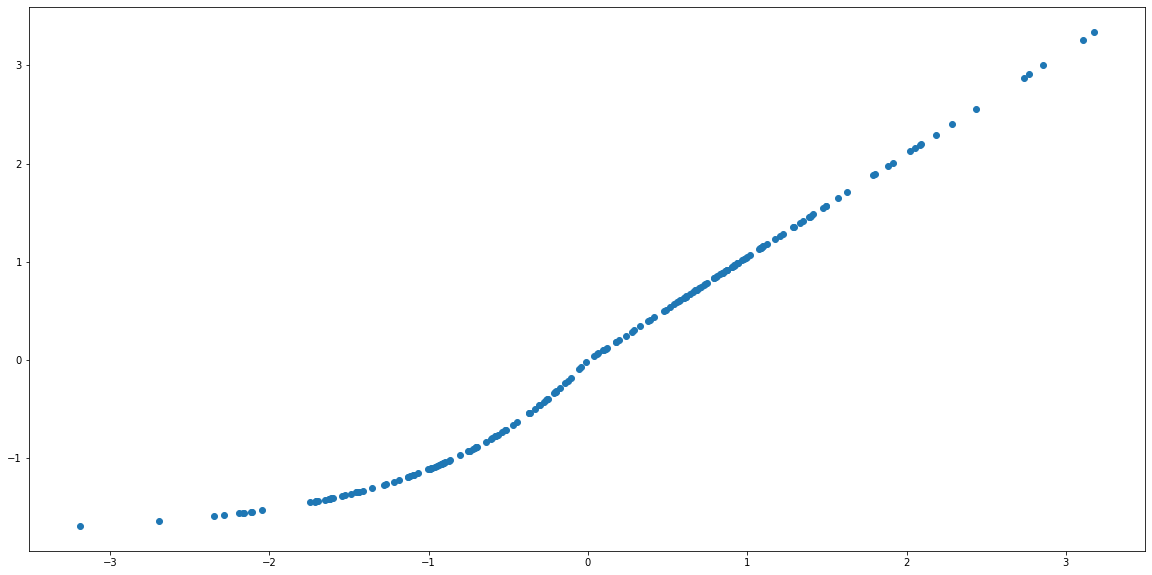

In [34]:
plt.figure(figsize=[20,10])
plt.scatter(x.view(200), x_selu.view(200))

1/1000 --- Loss: 1.9224156141281128
11/1000 --- Loss: 0.6931465864181519
21/1000 --- Loss: 0.6931465864181519
31/1000 --- Loss: 0.6931465864181519
41/1000 --- Loss: 0.6931465864181519
51/1000 --- Loss: 0.6931465864181519
61/1000 --- Loss: 0.6931465864181519
71/1000 --- Loss: 0.6931465864181519
81/1000 --- Loss: 0.6931465864181519
91/1000 --- Loss: 0.6931465864181519
101/1000 --- Loss: 0.6931465864181519
111/1000 --- Loss: 0.6931465864181519
121/1000 --- Loss: 0.6931465864181519
131/1000 --- Loss: 0.6931465864181519
141/1000 --- Loss: 0.6931465864181519
151/1000 --- Loss: 0.6931465864181519
161/1000 --- Loss: 0.6931465864181519
171/1000 --- Loss: 0.6931465864181519
181/1000 --- Loss: 0.6931465864181519
191/1000 --- Loss: 0.6931465864181519
201/1000 --- Loss: 0.6931465864181519
211/1000 --- Loss: 0.6931465864181519
221/1000 --- Loss: 0.6931465864181519
231/1000 --- Loss: 0.6931465864181519
241/1000 --- Loss: 0.6931465864181519
251/1000 --- Loss: 0.6931465864181519
261/1000 --- Loss: 0.69

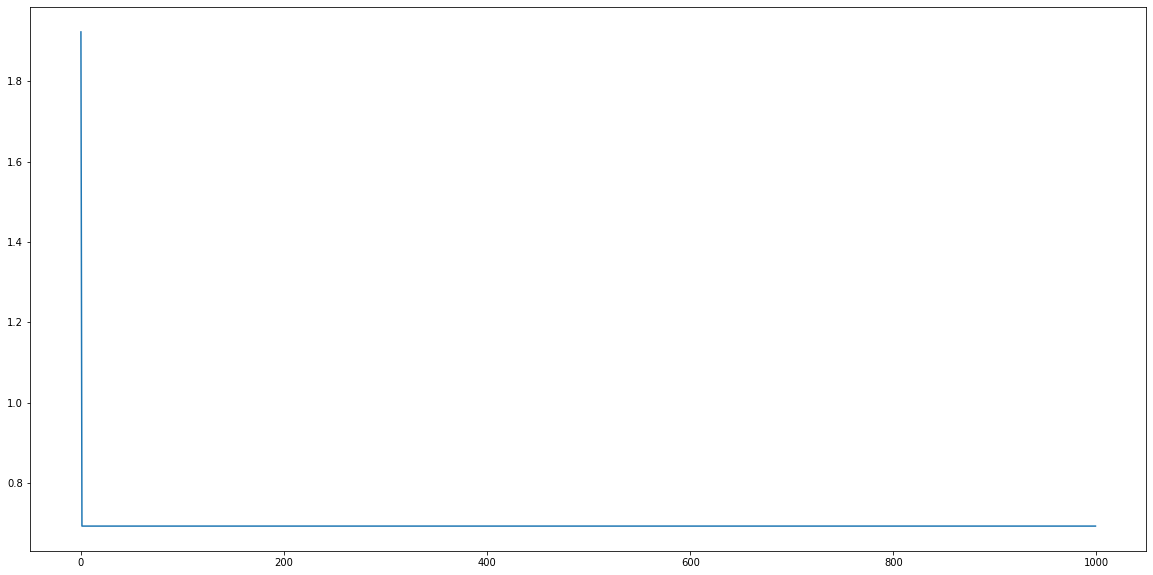

In [39]:
# convert all to negative values
temp_x = x - x.max() - 100

# Network Architecture
selu_model = nn.Sequential(
    nn.Linear(2,2),
    nn.SELU()
)

# loss function - CrossEntropy, optimiser - SGD
criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(selu_model.parameters(), lr=0.1)

# Training the model
epochs = 1000
loss = []

for e in range(epochs):
    optimiser.zero_grad() # zero gradients
    
    output = selu_model.forward(temp_x) # forward prop
    running_loss = criterion(output, y) # calculate loss
    loss.append(running_loss.item()) # store loss
    running_loss.backward() # back prop
    optimiser.step() #  update weights
    
    if e % 10 == 0:
        print('{}/{} --- Loss: {}'.format(e+1, epochs, running_loss))
        
plt.figure(figsize=[20,10])
plt.plot(range(epochs), loss)